In [52]:
import pandas as pd
import numpy as np
import numpy as py 


In [88]:
### Import the data sets

lego_sets = pd.read_csv(r'C:\Users\Acer\Documents\Visual Studio\Lego Datasets\lego_sets.csv')

parent_themes = pd.read_csv(r'C:\Users\Acer\Documents\Visual Studio\Lego Datasets\parent_themes.csv')

In [89]:
lego_sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [90]:
parent_themes.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [91]:
df = lego_sets.merge(parent_themes, left_on='parent_theme', right_on='name')
df.drop(columns='name_y', inplace=True)
df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [94]:
### starwars percentage 

license = df[df['is_licensed']]
license = license.dropna(subset=['set_num'])
license.head()

star_wars = license[license['parent_theme']=='Star Wars']

starwars_percent = int(star_wars.shape[0]/license.shape[0]*100)
print(starwars_percent)


51


In [95]:

sort_license = license.sort_values('year')
sort_license['count'] = 1

df_licensed = sort_license.groupby(['year','parent_theme']).sum().reset_index()
df_licensed.head()

year_license = df_licensed.sort_values('count', ascending= False).drop_duplicates(['year'])

year_license.sort_values('year', inplace=True)
year_license

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
license.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


<AxesSubplot:>

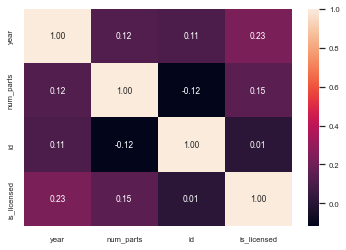

In [98]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='parent_theme', ylabel='count'>

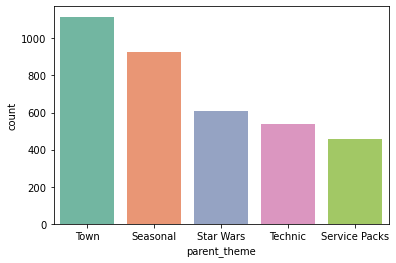

In [64]:
sns.countplot(x="parent_theme", data=df, palette="Set2", order=df['parent_theme'].value_counts().index[0:5])

In [65]:
star_wars

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
4097,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
4098,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
4099,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
4100,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


<AxesSubplot:xlabel='year', ylabel='count'>

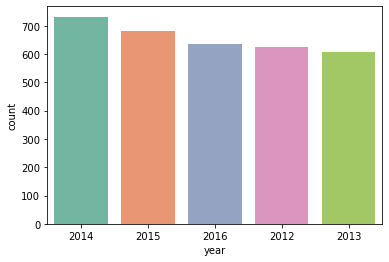

In [66]:
sns.countplot(x="year", data=df, palette="Set2", order=df['year'].value_counts().index[0:5])

<AxesSubplot:xlabel='year', ylabel='count'>

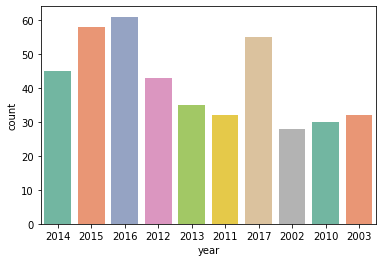

In [67]:
sns.countplot(x="year", data=star_wars, palette="Set2", order=df['year'].value_counts().index[0:10])

<AxesSubplot:ylabel='count'>

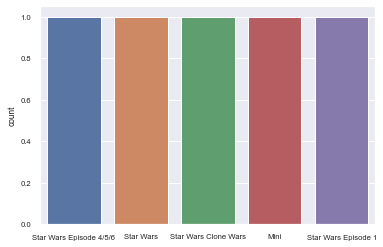

In [68]:
sns.set(font_scale=0.7)
sns.countplot(x=star_wars['theme_name'].value_counts().index[0:5])